# <span id="toc">  Esercitazione 9 - Travelling Salesman Problem </span>

[  Il problema del commesso viaggiatore ](#ex-9.0)

[  Panoramica del codice ](#codice-TSP)

[  9.1 - Disposizione su circonferenza ](#ex-9.1)

[  9.2 - Disposizione in un quadrato ](#ex-9.2)


### <span id="ex-9.0">  Il problema del commesso viaggiatore </span>[^](#toc)

commented paragraph

<!---
The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function (allora è un piccione viaggiatore, perchè vola tra le città):

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$
--->

commented paragraph

<!---
You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis, i chose the second option:
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">The first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators.

Nota: tanti tipi di mutazioni = muoversi meglio in modo più ergodico sulle possibili soluzioni >> miglior efficienza (velocità, convergenza).

Nota: un incrocio nella soluzione finale è quasi sempre indice di risultato non ancora raggiunto.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort (vale anche se sono separati!):
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!
--->

commented paragraph

<!---
Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>
--->

## <span id="codice-TSP">  Panoramica del codice </span>[^](#toc)
[Il main](#main)  
[La libreria TSP](#TSP)  
&nbsp;&nbsp;&nbsp;&nbsp;  [La classe Chromosome](#Chr)  
&nbsp;&nbsp;&nbsp;&nbsp;  [La classe Population](#Pop)  
&nbsp;&nbsp;&nbsp;&nbsp;  [La classe Problemset](#Prob)  
[Parametri utilizzati](#Param)  



### Osservazioni generali

Il codice è stato progettato dando la priorità all'**ordine**. Il lettore interessato troverà una documentazione ben fatta. L'efficienza di calcolo ha giocato un ruolo importante ma secondario.

Nel codice si usano termini associati alla genetica, per evidenziare l'universalità dell'approccio utilizzato.

Per funzionare, il codice ha bisogno di includere tutte e tre le librerie presenti nella cartella principale: `mylib`, `random`, `tsplib`. Non mi soffermo sulle prime due perchè sono già state introdotte in precedenza.

### <span id="main">  Il main </span>[^](#codice-TSP)

Il main è diviso in due parti: una di **inizializzazione** del problema, l'altra di esecuzione vera e propria, corrispondende all'**evoluzione** della popolazione.

Nella **prima parte** si inizializzano il generatore di numeri casuali e il Problemset (si generano le città, distribuite su una circonferenza o in un quadrato), si *dà vita* alla prima generazione di individui, e, sulla base dei criteri stabiliti dal Problemset, la si valuta e mette in ordine.

Nella **seconda parte** si cicla sulle generazioni. All'interno di ogni ciclo la popolazione viene fatta **mutare**, poi valutata e infine messa in ordine. Dopodichè i **risultati**, registrati sempre secondo i parametri del problemset, vengono salvati: in una directory `cit` le coordinate delle città associate al *miglior individuo* di ciascuna generazione (può essere facilmente sostituito con l'individuo i-esimo, se lo si desidera); in una directory `bestLen` le lunghezze associate al miglior percorso della generazione attuale, e la media delle lunghezze dei percorsi della metà migliore della popolazione.


### <span id="TSP"> La libreria TSP </span>[^](#codice-TSP)

La libreria TSP contiene i principali ingredienti per risolvere il problema del commesso viaggiatore, ed è il cuore di questa esercitazione. 
Ho progettato questa libreria in modo da renderla il più possibile flessibile: l'obiettivo è che volendo risolvere *un problema diverso* da quello del commesso viaggiatore, ma riconducibile allo stesso algoritmo genetico, sia sufficiente in futuro *modificare solo la classe `Problemset`* (in verità escludo di essere riuscito al $100%$ in questo obiettivo, ma lo scoprirò eventualmente quando mi toccherà provarci).

La libreria infatti è costituita da **tre classi** (più un paio di funzioni di cui avevo bisogno):
- `Problemset`: rappresenta il problema reale che vogliamo risolvere. In essa uso quindi termini associati al problema del commesso viaggiatore, come *city* e *length*.
- `Population` e `Chromosome`: rappresentano la parte più *profonda* e *generale* della libreria. Sono in linea di principio utilizzabili per descrivere qualsiasi problema mappabile sul nostro stesso algoritmo genetico. In esse uso perciò termini legati alla *genetica*, come `mutate`, `gene`, `parent` e `fitness`.

Ho aggiunto un file `parameters.h` per rendere più agevole la **modifica dei principali parametri del problema** (numero di individui in una generazione, numero di geni, numero di generazioni, probabilità delle mutazioni, esponente per l'estrazione dei migliori in `Mutate`).


#### <span id="Prob"> La classe `Problemset` </span>[^](#codice-TSP)

Per noi il problemset è quello del commesso viaggiatore. Per risolverlo, ho fornito a questa classe gli strumenti per:
- gestire le posizioni di un insieme di città (metodi `GenCircCities`, `GenSquareCities`; membri `Ncit`, `Xcit[]`, `Ycit[]`);
- interfacciarsi con l'utente, salvando i risultati (metodi `PrintCities`, `PrintBestLen`, `PrintBestLenAve`);
- interagire con la popolazione (metodi `EvalFitness`, `EvalAll`, `SortPop`);

I primi due punti sono abbastanza autoesplicativi. L'interazione con la popolazione è più complessa.  
Il metodo `EvalFitness` prende un cromosoma e calcola la lunghezza del percorso e la bontà ad esso associate, che salva nei membri dedicati.  
Il metodo `EvalAll` prende una popolazione e applica `EvalFitness` su tutti i suoi individui.  
Il metodo `SortPop` prende una popolazione e mette in ordine i suoi individui *dal peggiore al migliore*.



#### <span id="Pop"> La classe `Population` </span>[^](#codice-TSP)

Questa classe deve rappresentare un insieme di individui. Per farlo, l'ho fornita degli strumenti per:
- conservare un insieme di cromosomi e le lunghezze dei migliori (membri `Npop`, `BestLen`, `BestLenAve`, `Chr[Npop]`);
- nascere e mutare (metodi `Birth` e `Mutate`)

Si noti che la scelta di un metodo `Birth` alternativo al seplice costruttore è dovuta al principio di massima trasparenza (e non rallenta il codice).  
Il metodo `Mutate` rappresenta il **cuore** della libreria. Esso applica mutazioni a individui estratti dalla parte migliore della generazione attuale per dare vita a una nuova generazione migliorata. L'estrazione dell'indice dell'individuo tra i migliori segue a legge di potenza 
$$
h = \left(N_{pop}\cdot\left(1-\left(r^{\alpha}\right)\right)\right)-1
$$
dove $r$ è un numero casuale in $[0,1]$ ed $\alpha$ è un parametro libero (io ho posto $\alpha=6$, che tende a far estrarre $h$ più vicini al limite superiore.
Le mutazioni avvengono secondo rispettive probabilità e sono metodi della classe `Chromosome`.


#### <span id="Chr"> La classe `Chromosome` </span>[^](#codice-TSP)

<img src="../img/gene.png" width="600" />

E' la classe più complessa. Va immaginata come un array di numeri interi (equivalenti a dei *geni*), con gli attributi necessari a interagire col resto del problema. Nel nostro problemset ciascun gene indica la città da visitare. Ad esempio la sequenza [1,3,4,2] dice che devo visitare in ordine la prima città, poi la terza, poi la quarta e infine la seconda (prima di tornare alla partenza), secondo l'ordinamento di città stabilito al momento della loro creazione da parte del problemset. Ho dotato la classe di:
- membri privati basilari (`Ngen` e l'array `Gen[Ngen]`) e caratterizzanti (fitness `Ftn`, lunghezza `Len`, probabilità delle permutazioni `*Pm`, che punta a un array nel file dei parametri);
- metodi `Fill`, `Empty` (autoesplicativi) e `Print` (stampa l'array di geni);
- metodi per le mutazioni (`PairPermut`, `Shift`, `Shift2`, `MPermut`, `Inversion`, `Crossover`) e altri ad essi accessori (`Pbc` e `Check`);

Per i dettagli di ciascuno di questi si veda la documentazione presente nel codice.

**Nota**: per ridurre la degenerazione dei possibili risultati a $2$, ho fissato il primo gene a $1$.  
**Nota2**: la funzione `Check` deve verificare che **tutte le città vengano visitate**, quindi che non ci siano ripetizioni o buchi nel cromosoma (oltre a chiedere che il primo gene sia sempre $1$). Questa funzione è particolarmente importante da chiamare ogni volta che avviene una mutazione, per assicurare che tutto sia andato correttamente. Siccome viene chiamata molto spesso ho scelto di semplificarla affinchè non appesantisse i calcoli: la verifica consiste semplicemente nel controllare che la somma dei geni sia effettivamente pari a $\sum_{g=1}^{N_{gen}}g$. Per semplicità è implementata solo per alcuni valori di $N_{gen}$.


### <span id="Param"> Parametri utilizzati </span>[^](#codice-TSP)

Ho usato cicli di $500$ generazioni, con numero di individui variabile (vedi dopo), numero di geni $34$ e probabilità di mutazione rispettivamente:  
0.1 (PairPermut)  
0.1 (Invertion)  
0.2 (Shift)  
0.2 (Shift2)  
0.2 (MPermut)  
0.5 (Crossover)  


## <span id="ex-9.1">  Esercizio 9.1 - Disposizione su circonferenza </span>[^](#toc)


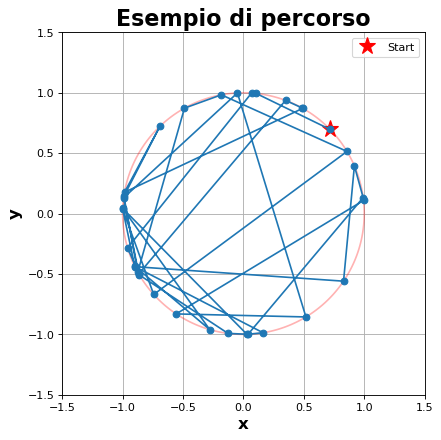

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

x,y = np.loadtxt("ex9/CIRCULAR/example_citycoord.out", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x[0],y[0], marker ="*", color = "r", markersize = 16, label = "Start", linestyle = "")
plt.plot(x, y, marker = "o", linestyle = "-")
plt.ylabel('y', fontsize = 15, fontweight = "bold")
plt.xlabel('x', fontsize = 15, fontweight = "bold")
plt.grid(True)
plt.title('Esempio di percorso', fontsize = 20, fontweight = "bold")
plt.legend()

x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(x,y)
F = X**2 + Y**2 - 1
plt.contour(X,Y,F,[0], colors = "r", alpha = 0.3)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

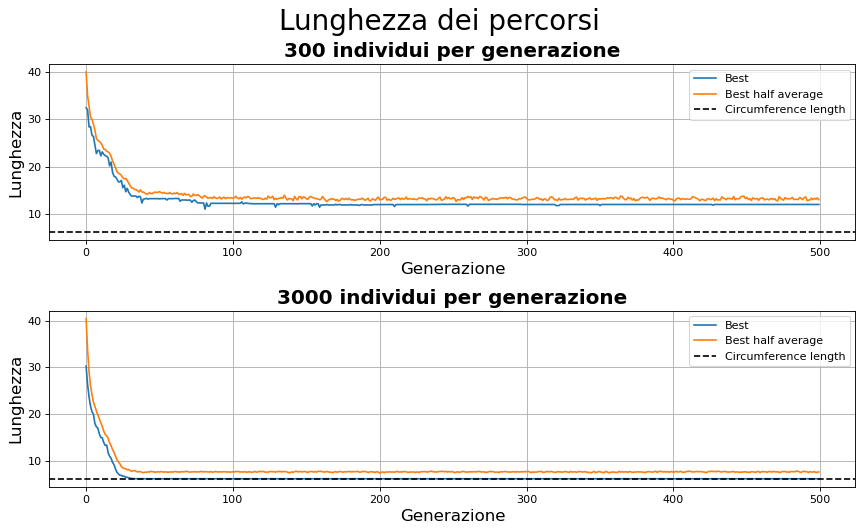

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(13, 7), dpi=80)
plt.suptitle("Lunghezza dei percorsi\n", fontsize = 25)

indivs =["300", "3000"]

for i in range(0,2):
    # using indivs[i] individuals per generation
    plt.subplot(2,1,i+1)
    gen,best = np.loadtxt("ex9/CIRCULAR/"+indivs[i]+"/bestLen/BL.out", usecols=(0,1), delimiter=' ', unpack='true')
    plt.plot(gen, best, marker = "", label = "Best") 
    bestave = np.loadtxt("ex9/CIRCULAR/"+indivs[i]+"/bestLen/BLAv.out", usecols=(1), delimiter=' ', unpack='true')
    plt.plot(gen, bestave, marker = "", label = "Best half average") 
    plt.ylabel('Lunghezza', fontsize =15)
    plt.xlabel('Generazione', fontsize =15)
    plt.grid(True)
    plt.axhline(y=2*np.pi, color = 'k', linestyle = '--', label = "Circumference length")
    plt.title(indivs[i]+' individui per generazione', fontsize = 18, fontweight = "bold")
    plt.legend()

plt.subplots_adjust(hspace=0.4)
plt.show()

Ecco un'animazione dei migliori cammini per ogni generazione, avendo usato 300 e 3000 individui per generazione.


<img src="../img/movieC300.gif" width="500" height="500" /> <img src="../img/movieC3000.gif" width="500" height="500" />


### Osservazioni

Si vede che utilizzando una popolazione ridotta, la ricerca del minimo è meno ergodica: in questo caso ad esempio si blocca su un cammino "andata-ritorno" di lunghezza quasi doppia rispetto all'optimum.

## <span id="ex-9.2">  Esercizio 9.2 - Disposizione in un quadrato </span>[^](#toc)


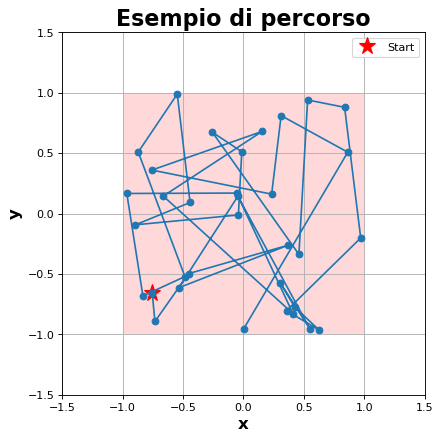

In [108]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


figure(figsize=(8, 6), dpi=80)

x,y = np.loadtxt("ex9/SQUARE/example_citycoord.out", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x[0],y[0], marker ="*", color = "r", markersize = 16, label = "Start", linestyle = "")
plt.plot(x, y, marker = "o", linestyle = "-")
plt.ylabel('y', fontsize = 15, fontweight = "bold")
plt.xlabel('x', fontsize = 15, fontweight = "bold")
plt.grid(True)
plt.title('Esempio di percorso', fontsize = 20, fontweight = "bold")
plt.legend()

rectangle = plt.Rectangle((-1,-1), 2, 2, fc='r', alpha = 0.15)
plt.gca().add_patch(rectangle)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

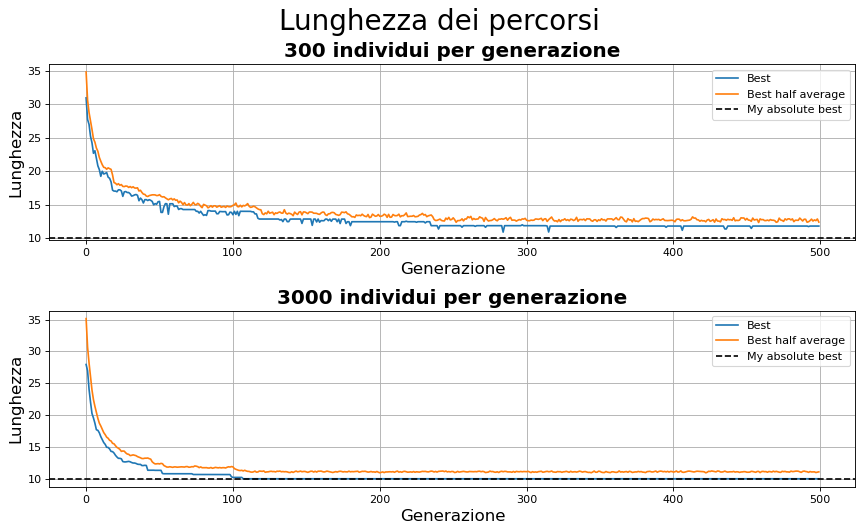

In [95]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(13, 7), dpi=80)
plt.suptitle("Lunghezza dei percorsi\n", fontsize = 25)

indivs =["300","3000"]

for i in range(0,2):
    # using indivs[i] individuals per generation
    plt.subplot(2,1,i+1)
    gen,best = np.loadtxt("ex9/SQUARE/"+indivs[i]+"/bestLen/BL.out", usecols=(0,1), delimiter=' ', unpack='true')
    plt.plot(gen, best, marker = "", label = "Best") 
    bestave = np.loadtxt("ex9/SQUARE/"+indivs[i]+"/bestLen/BLAv.out", usecols=(1), delimiter=' ', unpack='true')
    plt.plot(gen, bestave, marker = "", label = "Best half average") 
    plt.ylabel('Lunghezza', fontsize =15)
    plt.xlabel('Generazione', fontsize =15)
    plt.grid(True)
    plt.title(indivs[i]+' individui per generazione', fontsize = 18, fontweight = "bold")
    plt.axhline(y=9.968, color = "k", linestyle = "--", label = "My absolute best")
    plt.legend()

plt.subplots_adjust(hspace=0.4)
plt.show()

Ecco un'animazione dei migliori cammini per ogni generazione, avendo usato 3000 individui per generazione.

<img src="../img/movieQ.gif" width="500" height="500" />

### Osservazioni